In [1]:
source('K2methods.r') |> suppressPackageStartupMessages()
library(bnstruct)     |> suppressPackageStartupMessages()
asia <- read.csv('https://www.ccd.pitt.edu/wiki/images/ASIA10k.csv')

Warning message:
"il pacchetto 'bnlearn' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'bnstruct' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'igraph' è stato creato con R versione 4.2.3"


In [2]:
# convert the dataset into a series of integers
asia.modified = asia
asia.modified[asia == "yes"] = 2
asia.modified[asia == "no"] = 1

for (i in 1:length(names(asia.modified))) {
    name = names(asia.modified)[i]
    asia.modified[, name] = as.integer(as.character(asia.modified[, name]))
}

head(asia.modified)

,asia,tub,smoke,lung,bronc,either,xray,dysp
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,1,1,1,1,1,2
2,1,1,2,1,1,1,1,1
3,1,1,1,1,1,1,1,1
4,1,1,2,1,1,1,1,1
5,1,1,2,1,2,1,1,2
6,1,1,2,1,1,1,1,1


In [3]:
# convertion into BNDataset
DF = BNDataset(data = asia.modified, 
        discreteness = rep('d', ncol(asia.modified)), 
        variables = names(asia.modified), 
        node.sizes = rep(2, ncol(asia.modified)), 
        starts.from = 1)

In [4]:
net = learn.network(DF, algo = 'sm')

bnstruct :: learning the structure using SM ...

bnstruct :: learning using SM completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



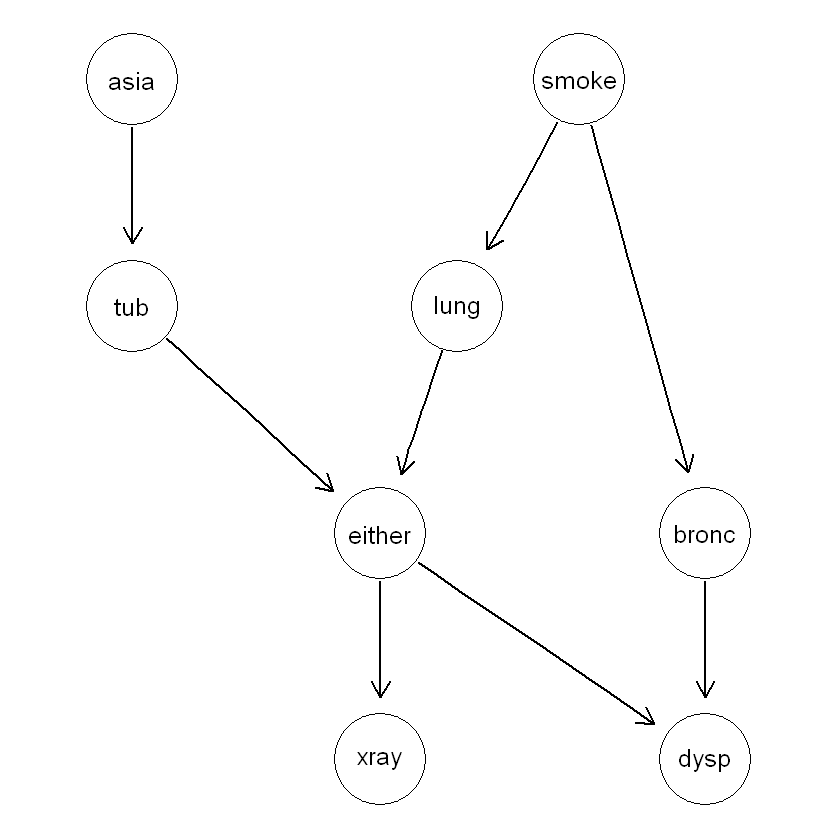

In [5]:
plot(net)

In [6]:
net_bnl = empty.graph(names(asia.modified))
amat(net_bnl) = dag(net)

In [7]:
# convertion for bnlearn final analysis
for (i in 1:length(names(asia.modified))) {
    name = names(asia.modified)[i]
    asia.modified[, name] = as.factor(as.character(asia.modified[, name]))
}

In [8]:
score(net_bnl, data = asia.modified, type = 'bic') # using DF is the same

[1] -22270.03

<!-- ### `bnstruct` with layering -->